In [2]:
from d2l import torch as d2l
import torch
from torch import nn

In [3]:
n_train, n_test, n_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((n_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [4]:
def init_params():
    W = torch.normal(0, 1, size=(n_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    
    return [W, b]

In [5]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [12]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    
    num_epochs, lr = 100, 0.003
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of W:', torch.norm(w).item())

L2 norm of W: 13.039422035217285


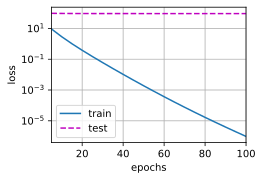

In [13]:
train(lambd=0)

L2 norm of W: 0.3528212904930115


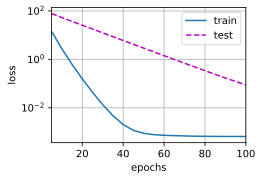

In [14]:
train(lambd=3)

In [21]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(n_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    
    num_epochs, lr = 100, 0.003
    
    trainer = torch.optim.SGD([
        {"params": net[0].weight, "weight_decay": wd},
        {"params": net[0].bias}
    ], lr=lr)
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of W:', net[0].weight.norm().item())

L2 norm of W: 12.390551567077637


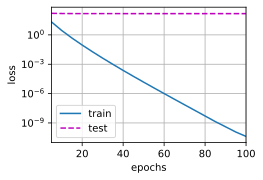

In [22]:
train_concise(0)

L2 norm of W: 0.4474857747554779


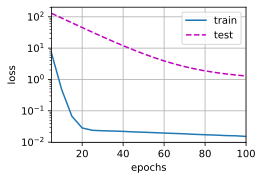

In [23]:
train_concise(3)